Successfully imported FedFuzzClus
Data shape: (150, 4)
Target shape: (150,)
starting experiment, total number of clients 5, min number of clients 3, random_clients = True
Final cluster centers:
[array([ 0.36870705, -0.36199656,  0.33326996,  0.22605013]), array([ 0.15648842, -0.66726497,  0.29160143,  0.16435287]), array([-1.01586679,  0.80921257, -1.28342055, -1.23873732])]


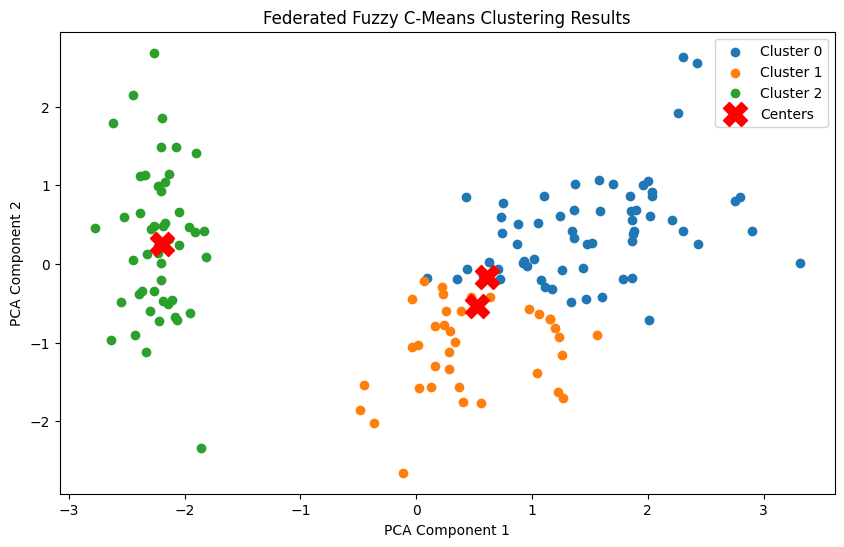

In [15]:


# Import the FedFuzzClus package
import FedFuzzClus
from FedFuzzClus.ffch import run_ffch_experiment

# Verify the package import
print("Successfully imported FedFuzzClus")

# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Standardize the dataset
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Print dataset shapes
print(f"Data shape: {data.shape}")
print(f"Target shape: {target.shape}")

# Function to partition the dataset
def partition_data(data, target, num_clients):
    data_chunks = np.array_split(data, num_clients)
    target_chunks = np.array_split(target, num_clients)
    return data_chunks, target_chunks

# Horizontally partition the data into chunks for clients
num_clients = 5
dataset_chunks, y_chunks = partition_data(data, target, num_clients)

# Client parameters
client_params = {
    'centroid_seed': 42,
    'num_clusters': 3,  # Number of clusters
    'lambda_factor': 2.0  # Fuzziness parameter
}

# Server parameters
server_params = {
    'epsilon': 0.001,
    'max_number_rounds': 10,
    'num_clusters': 3  # Number of clusters
}

# Running the fuzzy c-means clustering experiment
min_num_clients = 3
server, clients, final_centers = run_ffch_experiment(num_clients, min_num_clients, dataset_chunks, y_chunks,
                                                     client_params, server_params, random_clients=True,
                                                     random_clients_seed=42)

print("Final cluster centers:")
print(final_centers)

# Apply PCA to reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Get cluster assignments from each client
client_assignments = [client.finalize(final_centers)[1] for client in clients]
assignments = np.concatenate(client_assignments)

# Transform final cluster centers to 2D
final_centers_2d = pca.transform(final_centers)

# Plot the data points and cluster centers
plt.figure(figsize=(10, 6))

# Plot data points with cluster assignments
for cluster in range(client_params['num_clusters']):
    plt.scatter(data_2d[assignments == cluster, 0], data_2d[assignments == cluster, 1], label=f'Cluster {cluster}')

# Plot cluster centers
plt.scatter(final_centers_2d[:, 0], final_centers_2d[:, 1], s=300, c='red', label='Centers', marker='X')

plt.title('Federated Fuzzy C-Means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
